<a href="https://colab.research.google.com/github/spshreya/21daysofML/blob/main/anomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ICalls dataset.xlsx to ICalls dataset.xlsx


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('ICalls dataset.xlsx')

In [4]:
df.head()

,CALL_ID,START_TIMESTAMP,CALL_DURATION_SEC,CALLING_NUMBER_NOR,CALLED_NUMBER_NOR,RELEASE_CALSE_ID,IN_SWITCH_ID,IN_TRUNK_ID,IN_ACCOUNT_ID,IN_SERVICE_LEVEL_ID,...,OUT_ACCOUNT_ID,OUT_SERVICE_LEVEL_ID,OUT_SERVICE_ID,ROUTING_CLASS_ID,ROUTING_DESTINATION_ID,ROUTING_COUNTRY_ID,ORIG_COUNTRY_ID,ANSWERED,COST,REVENUE
0,1000284067810012905,2020-02-02 00:28:10,123,1.304815e+12,1.063402e+12,144,3,3814,381,8,...,221,0,1,8,1067,146,241,1,0.681010,0.682035
1,1000284067810012912,2020-02-02 00:30:13,1,7.718661e+10,1.458973e+10,144,3,3170,204,8,...,190,0,1,8,272224,67,229,1,0.002583,0.002583
2,1000284067810009861,2020-02-02 00:09:18,33,2.239853e+12,2.239770e+12,144,3,3170,204,3,...,130,0,1,4,1798,228,228,1,0.003025,0.003025
3,1000284067810012939,2020-02-02 00:29:47,43,2.457868e+13,2.457866e+13,144,3,3617,249,2,...,256,0,1,2,540,80,80,1,0.007102,0.000000
4,1000284067810012946,2020-02-02 00:28:51,101,1.966744e+12,2.238910e+12,144,3,1353,234,2,...,370,0,1,2,1778,228,107,1,0.013467,0.012120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CALL_ID                 99999 non-null  int64         
 1   START_TIMESTAMP         99999 non-null  datetime64[ns]
 2   CALL_DURATION_SEC       99999 non-null  int64         
 3   CALLING_NUMBER_NOR      99925 non-null  float64       
 4   CALLED_NUMBER_NOR       99991 non-null  float64       
 5   RELEASE_CALSE_ID        99999 non-null  int64         
 6   IN_SWITCH_ID            99999 non-null  int64         
 7   IN_TRUNK_ID             99999 non-null  int64         
 8   IN_ACCOUNT_ID           99999 non-null  int64         
 9   IN_SERVICE_LEVEL_ID     99999 non-null  int64         
 10  IN_SERVICE_ID           99999 non-null  int64         
 11  OUT_SWITCH_ID           99999 non-null  int64         
 12  OUT_TRUNK_ID            99999 non-null  int64 

In [7]:
df.describe()

,CALL_ID,CALL_DURATION_SEC,CALLING_NUMBER_NOR,CALLED_NUMBER_NOR,RELEASE_CALSE_ID,IN_SWITCH_ID,IN_TRUNK_ID,IN_ACCOUNT_ID,IN_SERVICE_LEVEL_ID,IN_SERVICE_ID,...,OUT_ACCOUNT_ID,OUT_SERVICE_LEVEL_ID,OUT_SERVICE_ID,ROUTING_CLASS_ID,ROUTING_DESTINATION_ID,ROUTING_COUNTRY_ID,ORIG_COUNTRY_ID,ANSWERED,COST,REVENUE
count,9.999900e+04,99999.000000,9.992500e+04,9.999100e+04,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.0,...,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.000284e+18,48.458295,8.290002e+13,1.427750e+15,113.165142,3.0,3160.778828,261.777788,4.906059,1.0,...,223.084791,0.0,0.945849,4.712877,25641.202932,133.344183,147.244782,0.301993,0.044938,0.048910
std,7.671378e+09,285.489648,1.699935e+16,5.386531e+16,59.675143,0.0,786.210202,95.391538,2.480387,0.0,...,74.992806,0.0,0.226316,2.650729,67733.326216,63.545003,70.959032,0.459125,0.230755,0.255000
min,1.000284e+18,0.000000,0.000000e+00,2.458955e+06,15.000000,3.0,354.000000,95.000000,0.000000,1.0,...,94.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000284e+18,0.000000,2.036361e+11,1.063033e+12,25.000000,3.0,2979.000000,204.000000,3.000000,1.0,...,198.000000,0.0,1.000000,3.000000,782.000000,81.000000,103.000000,0.000000,0.000000,0.000000
50%,1.000284e+18,0.000000,1.966352e+12,2.237122e+12,144.000000,3.0,3274.000000,253.000000,4.000000,1.0,...,221.000000,0.0,1.000000,3.000000,1079.000000,146.000000,147.000000,0.000000,0.000000,0.000000
75%,1.000284e+18,4.000000,2.237876e+12,4.977794e+12,148.000000,3.0,3754.000000,368.000000,8.000000,1.0,...,234.000000,0.0,1.000000,8.000000,1791.000000,178.000000,228.000000,1.000000,0.000525,0.000833
max,1.000284e+18,9010.000000,4.748148e+18,1.633697e+19,255.000000,3.0,3948.000000,396.000000,8.000000,1.0,...,396.000000,0.0,1.000000,8.000000,483676.000000,280.000000,280.000000,1.000000,16.592958,17.321500


In [9]:
df['OUT_SERVICE_ID'].value_counts()

1    94584
0     5415
Name: OUT_SERVICE_ID, dtype: int64

In [10]:
df['ROUTING_CLASS_ID'].value_counts()

8    34017
3    30658
2    21704
7     6135
4     5205
0     2280
Name: ROUTING_CLASS_ID, dtype: int64

In [12]:
from sklearn.ensemble import IsolationForest
contamination = 0.01
data = df.copy()

In [16]:
import datetime as dt
data['START_TIMESTAMP'] =  data['START_TIMESTAMP'].map(dt.datetime.toordinal)

In [18]:
data['START_TIMESTAMP'].unique()

array([737457])

In [22]:
data =data.fillna(0)

In [23]:
model = IsolationForest(contamination = contamination, n_estimators = 1000)
model.fit(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.01, n_estimators=1000)

In [24]:
df['iforest']= pd.Series(model.predict(data))
df['iforest'].value_counts()

 1    98999
-1     1000
Name: iforest, dtype: int64

In [26]:
pred = model.predict(data)

In [28]:
anomalies_ind=np.where(pred < 0)

In [ ]:
#lemme try this over a col at once so that I am able to plot this :)

In [47]:
data = df[['CALL_DURATION_SEC','REVENUE']]

In [68]:
model = IsolationForest(contamination = 0.001, n_estimators = 1000)
model.fit(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, n_estimators=1000)

In [69]:
pred = model.predict(data)

In [71]:
df['iforest']= pd.Series(pred)
df['iforest'].value_counts()

 1    99899
-1      100
Name: iforest, dtype: int64

In [72]:
anomalies_ind=np.where(pred < 0)

In [31]:
import matplotlib.pyplot as plt

In [36]:
#y = np.arange(0,99999)
#y

array([    0,     1,     2, ..., 99996, 99997, 99998])

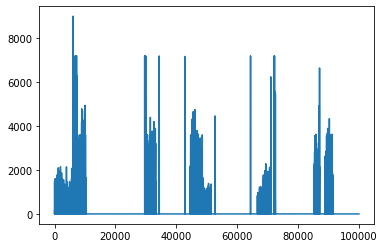

In [55]:
plt.plot(df['CALL_DURATION_SEC'])
#plt.plot()
#plt.yticks([0,1000,2000,3000,4000,5000,6000,7000,8000,9000])

In [73]:
x = data.values

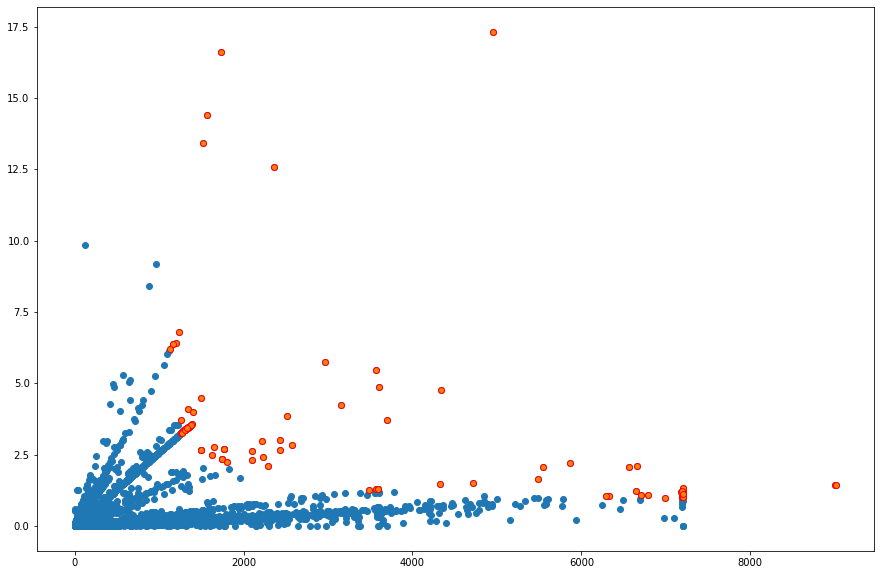

In [74]:
plt.figure(figsize=(15,10))
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[anomalies_ind,0], x[anomalies_ind,1], edgecolors='r')


In [44]:
df['CALLING_NUMBER_NOR'].value_counts()

1.951150e+12    3348
2.237972e+12     656
2.210187e+12     655
2.237989e+12     637
2.237996e+12     616
                ... 
2.210431e+12       1
1.966474e+12       1
4.400850e+13       1
2.324283e+11       1
2.466611e+12       1
Name: CALLING_NUMBER_NOR, Length: 47693, dtype: int64

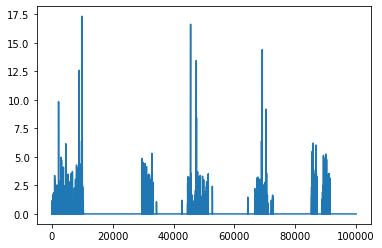

In [45]:
plt.plot(df['REVENUE'])